# Import Packages

In [1]:
#The purpose of this program is to plot the different definitions of the Ramberg-Osgood Equation
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import integrate
import sympy
from sympy import *
import pandas as pd
%matplotlib inline

from ipywidgets import *

# Import and View Data

In [2]:
#Import data
df1 = pd.read_csv('/Users/tbond/Desktop/Al 6061-S29.csv')

In [3]:
df1.head(5)

,Time,Displacement,Force,Strain 1,Tensile strain (Displacement),Tensile displacement,Tensile stress
0,0.0,0.0002,-0.0009,0.0016,0.0009,0.0002,-0.2261
1,0.1,-0.0002,0.0002,0.0024,-0.0008,-0.0002,0.0576
2,0.2,0.0005,0.0021,0.0029,0.0022,0.0005,0.5168
3,0.3,0.0009,0.0064,0.0042,0.0041,0.0009,1.5987
4,0.4,0.0015,0.0109,0.0061,0.0072,0.0015,2.7112


In [4]:
df1.describe()

,Time,Displacement,Force,Strain 1,Tensile strain (Displacement),Tensile displacement,Tensile stress
count,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000,3188.000000
mean,159.281494,1.327198,1.009579,5.604739,6.319994,1.327198,251.264294
std,91.932113,0.766204,0.310750,4.332759,3.648592,0.766204,77.339331
min,0.000000,-0.000200,-0.000900,0.001600,-0.000800,-0.000200,-0.226100
25%,79.675000,0.663875,0.968550,1.560225,3.161200,0.663875,241.048225
50%,159.350000,1.327850,1.154850,5.018750,6.323100,1.327850,287.421150
75%,239.025000,1.991875,1.192400,8.983275,9.485025,1.991875,296.761375
max,317.344600,2.644300,1.213700,14.906500,12.592000,2.644300,302.066700


In [5]:
#Remove nonsense data at end
df1 = df1[0:3000]

In [6]:
#Original gage dimensions of selected sample
org_width = 0.00199771
org_thick = 0.00196342

org_area = org_width*org_thick
org_area

3.922343768200001e-06

In [7]:
strain = df1['Strain 1'].div(100)
lat_strain = strain*0.33
# stress = force/area

In [8]:
width = (-lat_strain * org_width) + org_width
thick = (-lat_strain * org_thick) + org_thick

In [9]:
area = width * thick

In [10]:
stress = (df1['Force']*1000)/area

In [11]:
strain_arr = strain.values
stress_arr = stress.values
strain_arr

array([1.60000e-05, 2.40000e-05, 2.90000e-05, ..., 1.31357e-01,
       1.31474e-01, 1.31569e-01])

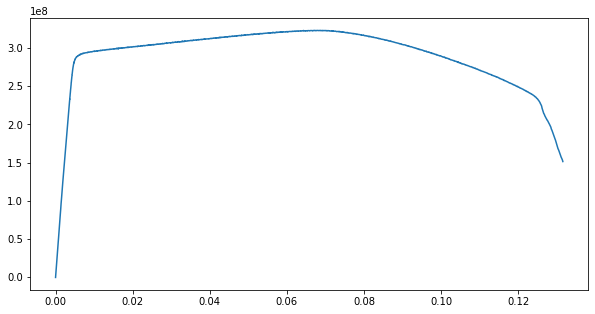

In [12]:
plt.figure(figsize=(10,5))
plt.plot(strain_arr, stress_arr)

# Ramberg Osgood Version 1 - Using K from Hollomon strain hardening

In [13]:
%%latex
\begin{align}
\text{Ramberg Osgood Version 1 - Using K from Hollomon strain hardening}\\
\epsilon &= \epsilon_e + \epsilon_p\\
\epsilon &= \frac{\sigma}{E} + \left(\frac{\sigma}{H}\right)^{1/n}\\
n &= \frac{log(\sigma_2/\sigma_1)}{log(\epsilon_2/\epsilon_1)}\\
K &= H = \frac{\sigma_1}{E_1^n}\\
\end{align}

<IPython.core.display.Latex object>

Parameters from experiments

In [14]:
E_lat = 67*10**9 #Young's Modulus, Pa
E_long = 65*10**9 #Young's Modulus, Pa
ys_lat = 280*10**6 #Lateral yield strength, Pa
ys_long = 289*10**6 #Longitudinal yield strength, Pa

n_lat = 26 #Ramberg osgood parameter
n_long = 18 #Ramberg osgood parameter
K_lat = 3.40*10**8 #Strengthening coefficient, Pa
K_long = 3.71*10**8 #Strengthening coefficient, Pa

mat = '6061 Aluminum' #Material type

In [15]:
#Stress Range, Pa
s_lat = np.linspace(0,310*10**6,100)
s_long = np.linspace(0,330*10**6,100)

#Ramberg Osgood Version 1 Using K from Hollomon hardening
e_lat = (s_lat/E_lat) + (s_lat/K_lat)**n_lat
e_long = (s_long/E_long) + (s_long/K_long)**n_long

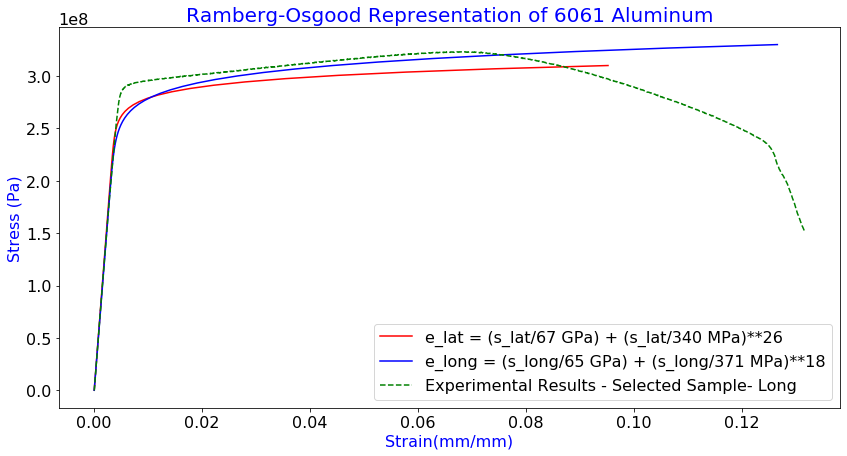

In [31]:
plt.figure(figsize=(14,7))
plt.plot(e_lat, s_lat, '-r', label='e_lat = (s_lat/{:.0f} GPa) + (s_lat/{:.0f} MPa)**{}'.format(E_lat/10**9,K_lat/10**6,n_lat), color='red')
plt.plot(e_long, s_long, '-r', label='e_long = (s_long/{:.0f} GPa) + (s_long/{:.0f} MPa)**{}'.format(E_long/10**9,K_long/10**6,n_long), color='blue')
plt.plot(strain_arr, stress_arr, label = "Experimental Results - Selected Sample- Long", color='green', linestyle='--')
plt.title('Ramberg-Osgood Representation of ' + mat, fontsize=20, color='blue')
plt.xlabel('Strain(mm/mm)', fontsize=16, color='blue')
plt.ylabel('Stress (Pa)', fontsize=16,color='blue')
plt.legend(loc='lower right', fontsize=16)

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

plt.savefig('ram_os_6061.png')

# Ramberg Osgood Version 1.2 Using K from Hollomon hardening, ideal formulation

In [17]:
#Parameters assuming ideal (logarithmic) strain hardening curve
n_lat_i = 14
n_lon_i = 13

K_lat_i = 4.32*10**8
K_lon_i = 4.61*10**8

In [18]:
#Stress range
Is1 = np.linspace(0,380*10**6,100)
Is2 = np.linspace(0,400*10**6,100)
#Ramberg Osgood stress-strain curve
Ie1 = (Is1/E_lat) + (Is1/K_lat_i)**n_lat_i
Ie2 = (Is2/E_long) + (Is2/K_lon_i)**n_lon_i

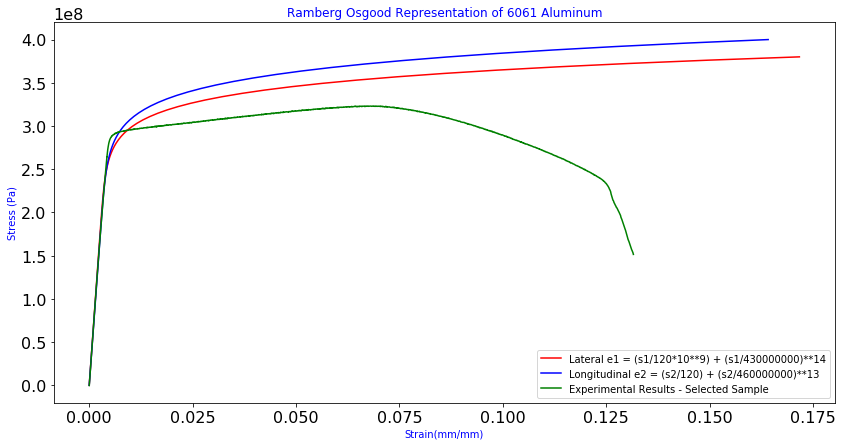

In [19]:
plt.figure(figsize=(14,7))
plt.plot(Ie1, Is1, '-r', label='Lateral e1 = (s1/120*10**9) + (s1/430000000)**14', color='red')
plt.plot(Ie2, Is2, '-r', label='Longitudinal e2 = (s2/120) + (s2/460000000)**13', color='blue')
plt.plot(strain_arr, stress_arr, label = "Experimental Results - Selected Sample", color='green')
plt.title('Ramberg Osgood Representation of ' + mat, color='blue')
plt.xlabel('Strain(mm/mm)', color='blue')
plt.ylabel('Stress (Pa)', color='blue')
plt.legend(loc='lower right')
plt.show()

# Ramberg Osgood Version 2 - 0.2% Offset Strain

In [20]:
%%latex
\begin{align}
\text{Ramberg Osgood Version 2 - 0.2% Offset Strain}\\ 
\epsilon = \frac{\sigma}{E} + 0.002\left(\frac{\sigma}{\sigma_y}\right)^{1/n}\\
\end{align}

<IPython.core.display.Latex object>

In [21]:
#Stress range
ps1 = np.linspace(0,330*10**6,100)
ps2 = np.linspace(0,360*10**6,100)

#Ramberg Osgood Version 2- Useing Yeild Stress and Strain
pere1 = (((ps1/E_lat) + 0.002*(ps1/ys_lat)**n_lat))*100
pere2 = (((ps2/E_long) + 0.002*(ps2/ys_long)**n_long))*100

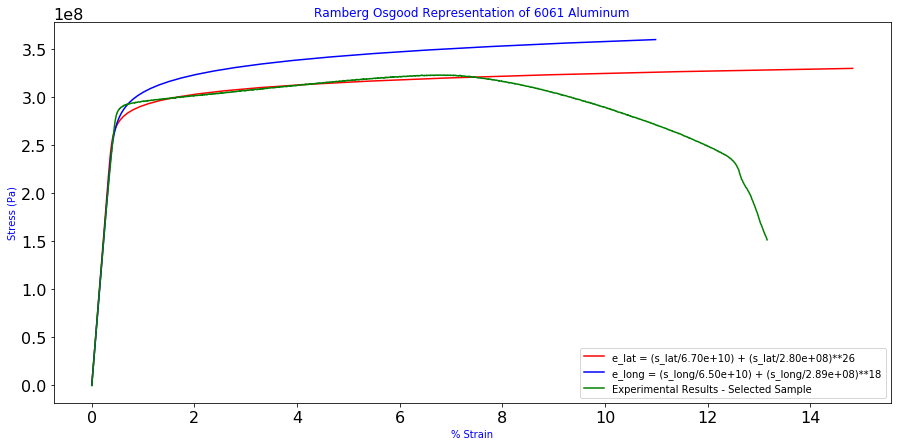

In [22]:
plt.figure(figsize=(15,7))
plt.plot(pere1, ps1, '-r', label='e_lat = (s_lat/{:.2e}) + (s_lat/{:.2e})**{}'.format(E_lat,ys_lat,n_lat), color='red')
plt.plot(pere2, ps2, '-r', label='e_long = (s_long/{:.2e}) + (s_long/{:.2e})**{}'.format(E_long,ys_long,n_long), color='blue')
plt.plot(strain_arr*100, stress_arr, label = "Experimental Results - Selected Sample", color='green')
plt.title('Ramberg Osgood Representation of ' + mat, color='blue')
plt.xlabel('% Strain', color='blue')
plt.ylabel('Stress (Pa)', color='blue')
plt.legend(loc='lower right')

plt.show()

# Ramberg Osgood Version 3- Using K derived in Ramberg-Osgood Paper

In [23]:
%%latex
\begin{align}
\text{Ramberg Osgood Version 3- Using K derived in Ramberg-Osgood Paper}\\ 
\epsilon = \frac{\sigma}{E} + K\left(\frac{\sigma}{E}\right)^{n}\\
K = \epsilon_y\left(\frac{E}{\sigma_y}\right)^{n}\\
\end{align}

<IPython.core.display.Latex object>

In [24]:
#Parameters for original Ramberg-Osgood formulation
K_lat_o = 1*10**60
K_lon_o = 2*10**40


In [25]:
#Stress range
rs_lat = np.linspace(0,305*10**6,100)
rs_lon = np.linspace(0,335*10**6,100)

#Ramberg Osgood Version 3- Using K derived in Ramberg Osgood Paper
Re1 = ((rs_lat/E_lat) + (K_lat_o)*(rs_lat/E_lat)**n_lat)
Re2 = ((rs_lon/E_long) + (K_lon_o)*(rs_lon/E_long)**n_long)

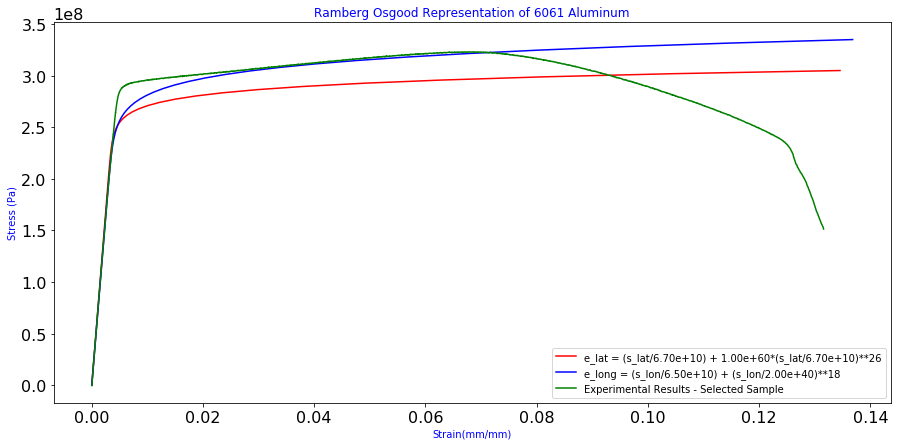

In [26]:
#Plot definition
plt.figure(figsize=(15,7))
plt.plot(Re1, rs_lat, '-r', label='e_lat = (s_lat/{:.2e}) + {:.2e}*(s_lat/{:.2e})**{}'.format(E_lat,K_lat_o,E_lat,n_lat), color='red')
plt.plot(Re2, rs_lon, '-r', label='e_long = (s_lon/{:.2e}) + (s_lon/{:.2e})**{}'.format(E_long,K_lon_o,n_long), color='blue')
plt.plot(strain_arr, stress_arr, label = "Experimental Results - Selected Sample", color='green')
plt.title('Ramberg Osgood Representation of ' + mat, color='blue')
plt.xlabel('Strain(mm/mm)', color='blue')
plt.ylabel('Stress (Pa)', color='blue')
plt.legend(loc='lower right')

plt.show()